In [76]:
import geopandas as gpd
# Pulled from https://map.mutualaid.nyc/data/nta.geojson
neighborhoods = gpd.read_file('nta.geojson')
neighborhoods

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry
0,BK88,54005019.048,047,Borough Park,39247.2278309,Brooklyn,3,"MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ..."
1,QN51,52488277.846,081,Murray Hill,33266.9047967,Queens,4,"MULTIPOLYGON (((-73.80379 40.77561, -73.79853 ..."
2,QN27,19726845.6282,081,East Elmhurst,19816.7120736,Queens,4,"MULTIPOLYGON (((-73.86110 40.76366, -73.85912 ..."
3,QN07,22887772.8652,081,Hollis,20976.3355739,Queens,4,"MULTIPOLYGON (((-73.75726 40.71814, -73.75371 ..."
4,MN06,10647077.5264,061,Manhattanville,17040.6854129,Manhattan,1,"MULTIPOLYGON (((-73.94608 40.82126, -73.94920 ..."
...,...,...,...,...,...,...,...,...
184,QN56,25016839.186,081,Ozone Park,24731.6990843,Queens,4,"MULTIPOLYGON (((-73.84013 40.68115, -73.83794 ..."
185,QN57,64558946.5305,081,Lindenwood-Howard Beach,79085.800116,Queens,4,"MULTIPOLYGON (((-73.85722 40.65028, -73.86001 ..."
186,BX36,21255485.4646,005,University Heights-Morris Heights,24100.4320396,Bronx,2,"MULTIPOLYGON (((-73.90487 40.85869, -73.90566 ..."
187,SI35,47137243.9734,085,New Brighton-Silver Lake,30320.3749733,Staten Island,5,"MULTIPOLYGON (((-74.08373 40.63574, -74.08444 ..."


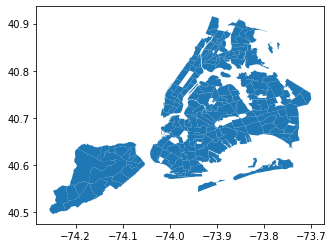

In [77]:
neighborhoods.plot()

In [78]:
# https://catalog.data.gov/dataset/zip-code-boundaries
zipcodes = gpd.read_file('zip://ZIP_CODE_040114.zip')
zipcodes

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17..."
259,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1028453.995 167153.410, 1027813.010 ..."
260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995877.318 203206.075, 995968.511 20..."
261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21..."


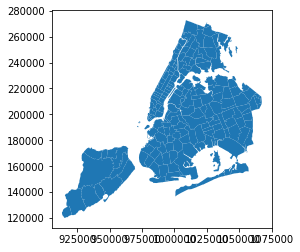

In [79]:
zipcodes.plot()

In [80]:
zipcodes.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [81]:
latlongzips = zipcodes.to_crs("WGS84")

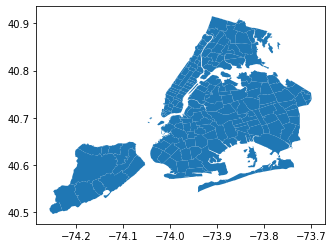

In [82]:
latlongzips.plot()

In [90]:
from collections import defaultdict
import json

zipmap = defaultdict(list)

for i in range(len(latlongzips)):
    zipcode = latlongzips.ZIPCODE[i]
    zippoly = latlongzips.geometry[i]
    for j in range(len(neighborhoods)):
        neighbormultipoly = neighborhoods.geometry[j]
        if neighbormultipoly.intersects(zippoly):
            zipmap[zipcode].append([neighborhoods.boro_code[j], neighborhoods.ntacode[j], neighborhoods.boro_name[j], neighborhoods.ntaname[j]])
            #print(zipcode, neighborhoods.boro_code[j], neighborhoods.ntacode[j], neighborhoods.boro_name[j], neighborhoods.ntaname[j])

with open('nyczipmap.js', 'w') as f:
    f.write('exports.nyczipmap = ')
    f.write(json.dumps(zipmap, indent=2))

In [84]:
for i in range(len(latlongzips)):
    if latlongzips.ZIPCODE[i] == '10026':
        print(i)
        break

48


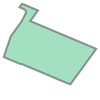

In [85]:
latlongzips.geometry[48]

In [86]:
for j in range(len(neighborhoods)):
    if neighborhoods.ntaname[j] == 'Central Harlem South':
        print(j)
        break

173


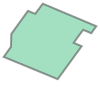

In [87]:
neighborhoods.geometry[173]

In [88]:
neighborhoods.geometry[173].intersects(latlongzips.geometry[48])

True

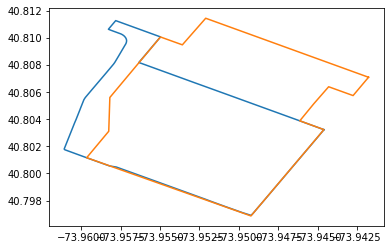

In [89]:
import matplotlib.pyplot as plt

x,y = latlongzips.geometry[48].exterior.xy
plt.plot(x,y)

x,y = neighborhoods.geometry[173][0].exterior.xy
plt.plot(x,y)